### 本节我想和大家分享一下，使用seaborn绘制图形的简单方式，
### seaborn是一个建立在matplotlib基础之上的绘图库，功能非常强大，整合了一部分pandas的功能,可以瞬间完成很复杂的图形绘制
### 本次我们只分享基本的用法，想了解更详细知识的同学请参考官方文档

- 本次分享的主要内容：
	- 使用plt绘制sns风格的图形
	- 绘制频次直方图，KDE平滑分布图，两者的混合图，二维KDE图
	- 绘制联合分布图
    - 绘制分面频次直方图
	- 绘制条形图

In [1]:
# 导入seaborn包，并设置默认绘图风格
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

import seaborn as sns;sns.set()

In [2]:
# 准备随机数据
rng = np.random.RandomState(0)
x = np.linspace(0,10,500)
y = np.cumsum(rng.randn(500,6),0)

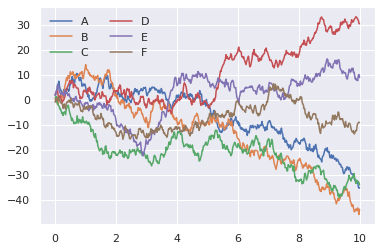

In [3]:
# 此时绘制的图像风格为sns基础风格，比matplot的默认风格好看那么一点点
plt.plot(x,y)
plt.legend('ABCDEF',frameon=False,ncol=2,loc='best')

#### 绘制频次直方图，KDE平滑分布图，两者的混合图，二维KDE图

In [4]:
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]],size=2000)
data.shape

(2000, 2)

In [5]:
data = pd.DataFrame(data,columns=['x','y'])
data.head(3)

,x,y
0,-3.803416,0.202108
1,1.017159,-1.260782
2,-1.849671,0.581975


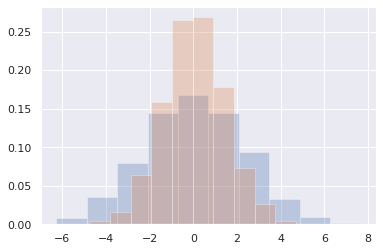

In [6]:
# 绘制频次直方图
for col in 'xy':
    plt.hist(data[col],density=True,alpha=0.3)

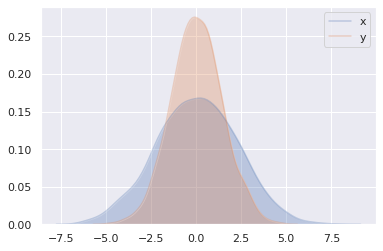

In [10]:
# 绘制KDE平滑分布图
for col in 'xy':
    sns.kdeplot(data[col],alpha=0.3,shade=True)

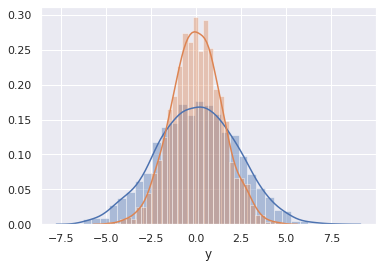

In [11]:
# 同时绘制频次直方图，KDE平滑分布图
for col in 'xy':
    sns.distplot(data[col])

Text(0.5, 0, 'xx')

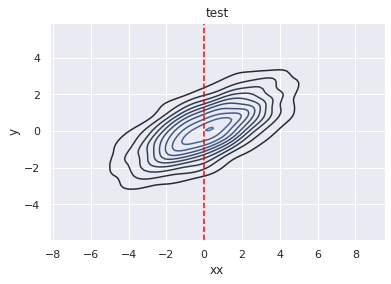

In [15]:
# 绘制二维KDE图
g = sns.kdeplot(data['x'],data['y'])
g.axvline(x=0,linestyle='--',color='red')
g.set_title('test')
g.set_xlabel('xx')

#### 绘制联合分布图

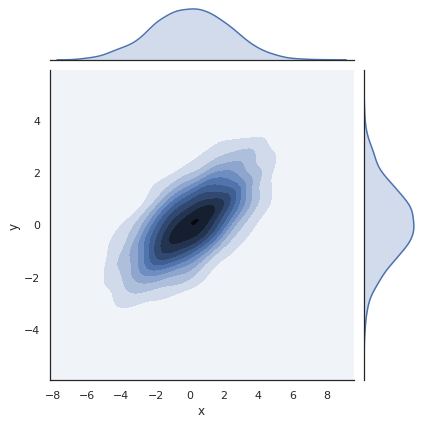

In [16]:
# kind='kde'
with sns.axes_style('white'):
    sns.jointplot('x','y',data,kind='kde')

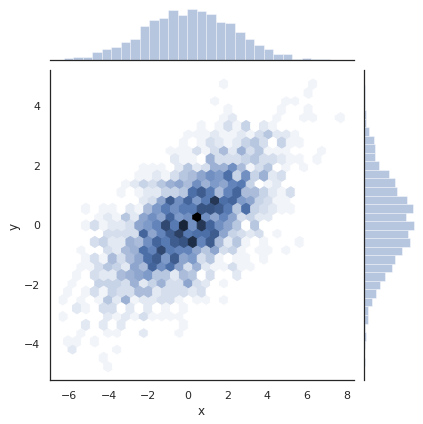

In [17]:
# kind='hex'
with sns.axes_style('white'):
    sns.jointplot('x','y',data,kind='hex')

#### 绘制分面频次直方图

In [21]:
# 读取演示数据(小费的统计数据)
path = 'tips.csv'
tips = pd.read_csv(path)
tips.head(3)
# tips.info()
# tips.describe()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [22]:
# 添加一列，显示小费占总消费额的百分比
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


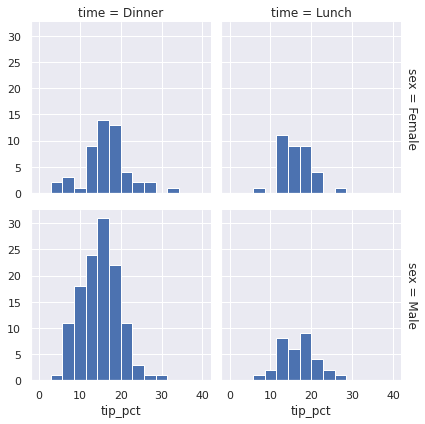

In [24]:
# 建立分类网格，对原始数据先按性别分类，再按时间段分类
grid = sns.FacetGrid(data=tips,row='sex',col='time',margin_titles=True)
# 分别统计每个分组在给定区间的数据出现频次，然后绘制直方图
grid.map(plt.hist,'tip_pct',bins=np.linspace(0,40,15))

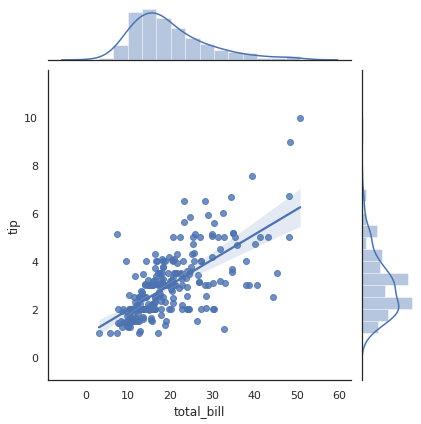

In [27]:
# 绘制带回归拟合的联合分布图,可以发现账单金额越高，给的小费越多
with sns.axes_style('white'):
    sns.jointplot('total_bill','tip',data=tips,kind='reg')

#### 绘制条形图

In [28]:
# 读取有关行星发现的统计数据，进行演示
path = 'planets.csv'
planets = pd.read_csv(path)
planets.head(3)

,rowid,pl_discmethod,pl_pnum,pl_orbper,pl_msinij,st_dist,pl_disc
0,1,Radial Velocity,1,269.300,7.10,77.40,2006
1,2,Radial Velocity,1,874.774,2.21,56.95,2008
2,3,Radial Velocity,1,763.000,2.60,19.84,2011


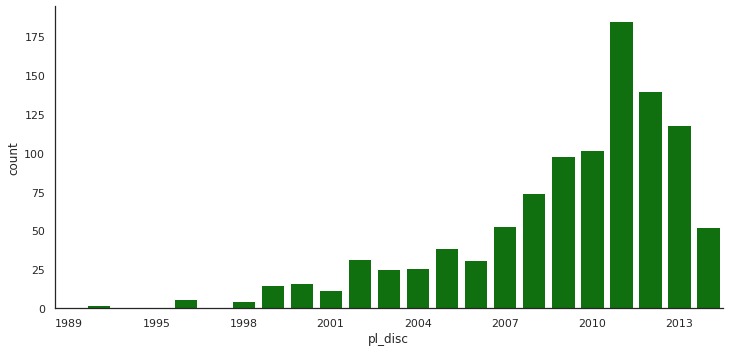

In [29]:
# 按照年份分类，统计每年发现的行星总数，并绘制条形图(catplot),设置每隔三年，显示一个x轴标签
with sns.axes_style('white'):
    g = sns.catplot('pl_disc',data=planets,aspect=2,color='green',kind='count')
    g.set_xticklabels(step=3)

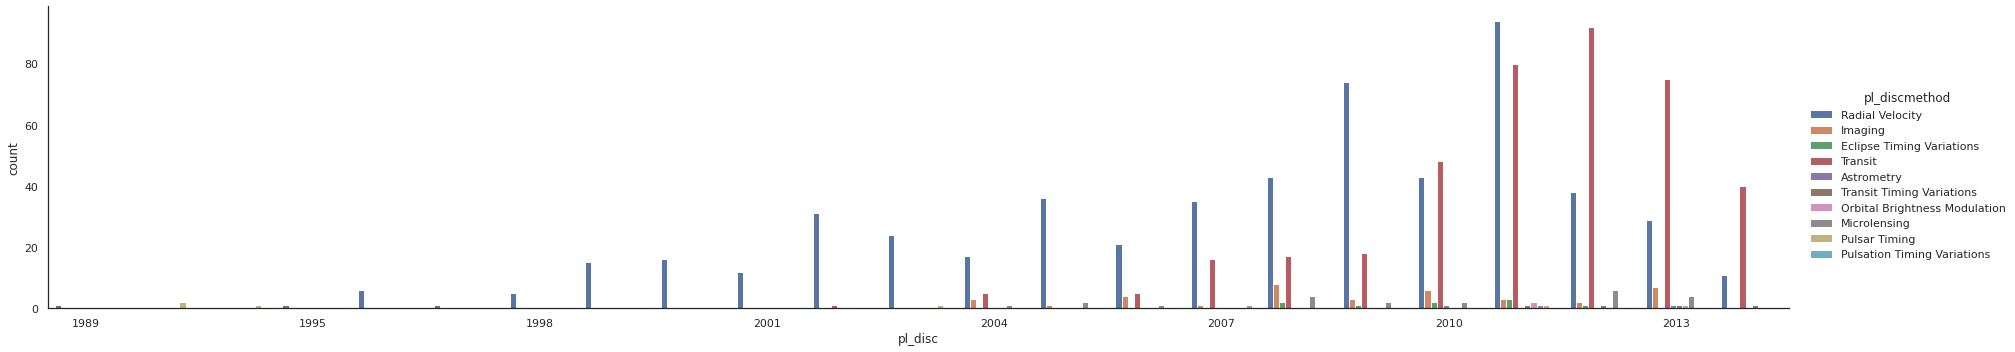

In [30]:
# 先按照年份分类，再按发现方式分类，统计每年不同方法分别发现的行星数，并绘制条形图
with sns.axes_style('white'):
    g = sns.catplot('pl_disc',data=planets,aspect=5,hue='pl_discmethod',kind='count')
    g.set_xticklabels(step=3)